In [1]:
from pandas_datareader import data

In [2]:
import pandas_profiling

In [89]:
IBM=data.DataReader('IBM',start='2004',end='2019',
                   data_source='yahoo')
IBM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,92.849998,92.160004,92.660004,92.680000,4726900.0,61.915489
2004-01-02,93.050003,91.199997,92.860001,91.550003,5327800.0,61.160595
2004-01-05,93.089996,92.000000,92.000000,93.050003,5276300.0,62.162693
2004-01-06,93.190002,92.139999,92.199997,93.059998,4380000.0,62.169365
2004-01-07,93.379997,92.470001,93.139999,92.779999,4927600.0,61.982319


In [90]:
IBM.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,111.000000,107.500000,109.900002,107.570000,3821400.0,101.585991
2018-12-26,111.389999,105.940002,108.000000,111.389999,6645800.0,105.193497
2018-12-27,113.779999,109.470001,109.989998,113.779999,6045600.0,107.450539
2018-12-28,114.800003,112.500000,114.220001,113.029999,5117500.0,106.742264
2018-12-31,114.349998,112.419998,113.330002,113.669998,4982800.0,107.346657


In [91]:
IBM.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3776.000000,3776.000000,3776.000000,3776.000000,3.776000e+03,3776.000000
mean,138.723091,136.634595,137.625252,137.698999,5.735134e+06,106.458762
std,39.346394,39.065203,39.212126,39.209461,3.098423e+06,35.593995
min,73.690002,69.500000,72.529999,71.739998,1.027500e+06,48.570713
25%,99.965000,98.500000,99.142502,99.365002,3.726300e+06,68.739008
50%,142.860001,140.764999,141.899994,141.860001,4.936300e+06,115.123821
75%,169.389999,166.835003,167.982498,168.264996,6.814525e+06,138.547127
max,215.899994,214.300003,215.380005,215.800003,3.077070e+07,165.514679


In [92]:
pandas_profiling.ProfileReport(IBM)

In [93]:
ibm=IBM['Close']
ibm

Date
2003-12-31     92.680000
2004-01-02     91.550003
2004-01-05     93.050003
2004-01-06     93.059998
2004-01-07     92.779999
                 ...    
2018-12-24    107.570000
2018-12-26    111.389999
2018-12-27    113.779999
2018-12-28    113.029999
2018-12-31    113.669998
Name: Close, Length: 3776, dtype: float64

In [94]:
import matplotlib.pyplot as plt

In [95]:
import seaborn as sns

In [96]:
%matplotlib inline
sns.set()

In [ ]:
plt.figure(figsize=(20,9))
ibm.plot();

In [ ]:
fig = plt.figure(figsize=(16,8))
ibm.plot(alpha=0.2,style='-')
ibm.resample('BA').mean().plot(style=':')  # here BA is a business year
ibm.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],
           loc='upper left');

In [ ]:
fig = plt.figure(figsize=(16,8))
ibm.plot(alpha=0.2,style='-')
ibm.resample('BM').mean().plot(style=':')  # here BA is a business month
ibm.asfreq('BM').plot(style='--')
plt.legend(['input','resample','asfreq'],
           loc='upper left');

In [ ]:
fig = plt.figure(figsize=(16,8))
ibm.plot(alpha=0.9,style='-')
ibm.resample('BQS').mean().plot(style=':',alpha=1)  # here BA is a business quarter year end
ibm.asfreq('BQS').plot(style='--')
plt.legend(['input','resample','asfreq'],
           loc='upper left');

In [ ]:
fig =plt.figure(figsize=(16,9))
fig,ax= plt.subplots(2, sharex=True) # here 2 means plot is divided into two and sharex=true means share 
                                    #the values of x[1] to x[0]
# missing data
data.asfreq ('D').plot(ax=ax[0],marker='*')

data.asfreq ('D',method='bfill').plot(ax=ax[1], style='-o')
data.asfreq ('D',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(['backfill','forwardfill'])

In [ ]:
fig =plt.figure(figsize=(16,9))
fig,ax= plt.subplots(2, sharex=True) # here 2 means plot is divided into two and sharex=true means share 
                                    #the values of x[1] to x[0]
data=ibm.iloc[:120]
# missing data
data.asfreq('M').plot(ax=ax[0],marker='*')

data.asfreq('M',method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('m',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(['backfill','forwardfill'])

In [ ]:
ibm.iloc[:120]

# time shifts

# shifts  is used to shift the date not valuess
# tshifts is used to shift the index 

In [ ]:
import pandas as pd

In [ ]:
fig,ax = plt.subplots(3,sharey=True)
ibm=ibm.asfreq('D',method='pad')
ibm.plot(ax=ax[0])
ibm.shift(900).plot(ax=ax[1])
ibm.tshift(900).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2010-12-05')
offset = pd.Timedelta(900,'D')

ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.5,color='red')

ax[1].legend(['input'],loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy',color='red')
ax[1].axvline(local_max + offset,alpha=0.5,color='red')

ax[2].legend(['input'],loc=2)
ax[2].get_xticklabels()[2].set(weight='heavy',color='red')
ax[2].axvline(local_max + offset,alpha=0.5,color='red')


In [ ]:
ibm1=IBM['Open']
ibm1

In [ ]:
%matplotlib inline
sns.set()

In [ ]:
plt.figure(figsize=(20,9))
ibm1.plot()

In [ ]:
fig = plt.figure(figsize=(16,8))
ibm1.plot(alpha=0.6,style='-')
ibm1.resample('BA').mean().plot(style=':')  # here BA is a business year
ibm1.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'],
           loc='upper left');

In [ ]:
fig = plt.figure(figsize=(20,9))
ibm1.plot(alpha=0.9,style='*')
ibm1.resample('BM').mean().plot(style='-')
ibm1.asfreq('BM').plot(style='--')
plt.legend(['input','resample','asfreq'],
          loc= 'upper right');

In [ ]:
fig = plt.figure(figsize=(20,9))
ibm1.plot(alpha=0.9,style='-')
ibm1.resample('BQS').mean().plot(style='-')
ibm1.asfreq('BQS').plot(style='--')
plt.legend(['input','resample','asfreq'],
          loc='upper right')

In [ ]:
fig =plt.figure(figsize=(16,9))
fig,ax= plt.subplots(2, sharex=True) # here 2 means plot is divided into two and sharex=true means share 
                                    #the values of x[1] to x[0]
# missing data
data.asfreq ('D').plot(ax=ax[0],marker='*')

data.asfreq ('D',method='bfill').plot(ax=ax[1], style='-o')
data.asfreq ('D',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(['backfill','forwardfill'])

In [ ]:
fig =plt.figure(figsize=(16,9))
fig,ax= plt.subplots(2, sharex=True) # here 2 means plot is divided into two and sharex=true means share 
                                    #the values of x[1] to x[0]
data=ibm1.iloc[:120]
# missing data
data.asfreq('M').plot(ax=ax[0],marker='*')

data.asfreq('M',method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('m',method='ffill').plot(ax=ax[1],style='--*')
ax[1].legend(['backfill','forwardfill'])

In [ ]:
fig,ax = plt.subplots(3,sharey=True)
ibm1=ibm1.asfreq('D',method='pad')
ibm1.plot(ax=ax[0])
ibm1.shift(900).plot(ax=ax[1])
ibm1.tshift(900).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2010-12-05')
offset = pd.Timedelta(900,'D')

ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.5,color='red')

ax[1].legend(['input'],loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy',color='red')
ax[1].axvline(local_max + offset,alpha=0.5,color='red')

ax[2].legend(['input'],loc=2)
ax[2].get_xticklabels()[2].set(weight='heavy',color='red')
ax[2].axvline(local_max + offset,alpha=0.5,color='red')


In [ ]:
fig = plt.figure(figsize=(16,8))
ROI = 100 * (ibm.shift(365)/ibm-1)  # roi = netprofit/total investment *100
ROI.plot()
plt.ylabel('% return on investment');

In [ ]:
fig = plt.figure(figsize=(16,8))
ROI = 100 * (ibm.tshift(365)/ibm-1)  # roi = netprofit/total investment *100
ROI.plot()
plt.ylabel('% return on investment');

# Rolling window

# addictive time series = trending+seasonal+rediculous
# multiple time series = t**s**r
# stational time series means its mean median std deviation std variance doesn't change it is constant
# non stationary time series means it keeps on change according to situation

In [ ]:
plt.figure(figsize=(16,9))
rolling = ibm.rolling(365,center=False)
data = pd.DataFrame({'input': ibm,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()
                    })
ax= data.plot(style=['-','--'])
ax.lines[0].set_alpha(0.5)

In [ ]:
plt.figure(figsize=(16,9))
rolling = ibm.rolling(365,center=True)
data = pd.DataFrame({'input': ibm,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()
                    })
ax= data.plot(style=['-','--'])
ax.lines[0].set_alpha(0.5)

In [2]:
import pandas as pd
d = pd.read_csv(r"C:\Users\LENOVO\Desktop\Fremont_Bridge_Bicycle_Counter.csv",index_col='Date',parse_dates=True)
d

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-02-29 19:00:00,29.0,11.0,18.0
2020-02-29 20:00:00,27.0,7.0,20.0
2020-02-29 21:00:00,20.0,9.0,11.0


In [ ]:
d.head()

In [ ]:
d.tail()

In [ ]:
d.describe()

In [ ]:
d.isna().sum()

In [ ]:
d[d['Fremont Bridge Total'].isnull()]

In [ ]:
d[d['Fremont Bridge East Sidewalk'].isnull()]

In [ ]:
d[d['Fremont Bridge West Sidewalk'].isnull()]

In [ ]:
d.info()

In [ ]:
d.columns

In [ ]:
d.notna().sum()

In [ ]:
d.dropna().describe()

In [3]:
%matplotlib inline
import seaborn
seaborn.set()

Text(0, 0.5, 'hourly bicycle count')

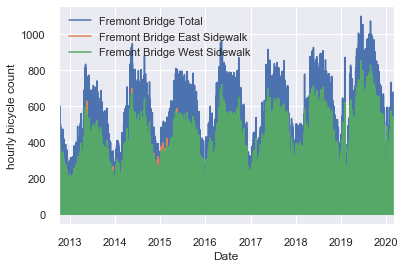

In [106]:
d.plot()
plt.ylabel('hourly bicycle count')

In [4]:
weekly = d.resample('W').sum()
weekly.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-07,14292.0,7297.0,6995.0
2012-10-14,16795.0,8679.0,8116.0
2012-10-21,15509.0,7946.0,7563.0
2012-10-28,13437.0,6901.0,6536.0
2012-11-04,12194.0,6408.0,5786.0


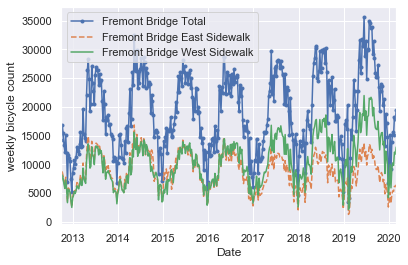

In [5]:
import matplotlib.pyplot as plt
weekly.plot(style=['.-','--','-'])
plt.ylabel('weekly bicycle count');

In [11]:
daily = d.resample('D').sum()
daily.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0
2012-10-06,2006.0,1080.0,926.0
2012-10-07,2142.0,1191.0,951.0


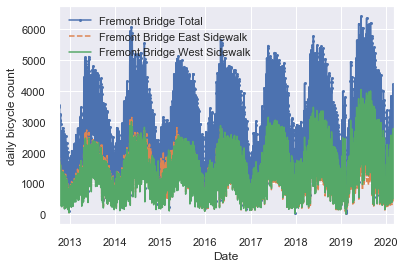

In [12]:
daily.plot(style=['.-','--','-'])
plt.ylabel('daily bicycle count');

In [6]:
hourly= d.resample('H').sum()
hourly.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


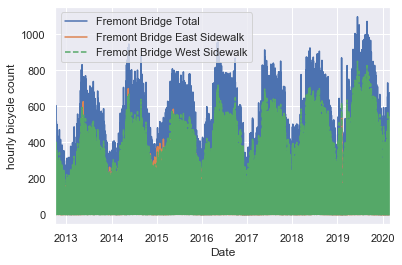

In [7]:
hourly.plot(style=['-','-','--'])
plt.ylabel('hourly bicycle count');

In [8]:
minutewise = d.asfreq('T')
minutewise.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 00:01:00,NaN,NaN,NaN
2012-10-03 00:02:00,NaN,NaN,NaN
2012-10-03 00:03:00,NaN,NaN,NaN
2012-10-03 00:04:00,NaN,NaN,NaN


In [ ]:
minutewise.plot(style=['-','.-','*'])
plt.ylabel('minute wise plot')

Text(0, 0.5, 'minute wise plot')

In [ ]:
minutewise.plot(style=['.-','--','-'])
plt.ylabel('minutewise plot')